University of Helsinki, Master's Programme in Data Science  
DATA16001 Network Analysis - Spring 2025  
Michail Mathioudakis  

# Assignment: Signed Relationships (due on Feb 13)

In Class 4, we discussed an algorithm to test for balance in signed, undirected, possibly incomplete networks (see Section 5.5.A of the textbook and the corresponding lecture). For this assignment, we refer to that algorithm as the **BalanceTest** algorithm.

Implement the BalanceTest algorithm. The algorithm takes as 
- **input** a signed, undirected network 
- and returns as **output** a boolean value indicating whether the network is balanced or not.

Examine the following two networks:
- (N1) The network stored from Figure 5.8 in the textbook.
- (N2) A modified version of the above network, with switched sign for the edge between node 2 and node 4 (i.e., the edge between them now has positive rather than negative sign).

Execute the BalanceTest algorithm on each network.

For each network, use the text box below to report whether it is balanced or not. If it is balanced, report also the two disjoint sets of nodes that are implied by balance. If it is not balanced, report also a cycle that explains that balance is not satisfied.


#### Recall that the steps of the BalanceTest algorithm discussed in class are the following:

**input**: graph with signed edges 

**output**: is graph balanced?

- consider subgraph with only + edges
- group nodes by connected component
- if there is a – edge within a group, then return **NO**
- replace each group with one ‘supernode’
	- note: only – edges remain
- perform Breadth-First-Search from some node
- if two nodes in same layer are connected, then return **NO** otherwise return **YES**

In [19]:
import networkx as nx
import matplotlib.pyplot as plt

In [20]:
def baltest(G: nx.Graph) -> bool:
	# step 1: consider subgraph with only + edges
	positive_edges = [(u, v) for u, v, sign in G.edges(data="sign") if sign == '+']
	G_plus = G.edge_subgraph(positive_edges).copy()
	for node in G.nodes:
		if node not in G_plus:
			G_plus.add_node(node)
	# step 2: group nodes by connected component
	connected_components = list(nx.connected_components(G_plus))
	# step 3: if there is a – edge within a group, then return NO
	for component in connected_components:
		for u, v in G_plus.edges(component):
			if G[u][v].get('sign') == '-':
				return False
	# step 4: replace each group with one ‘supernode’
	supernode_graph = nx.Graph()
	node_to_component = {node: i for i, comp in enumerate(connected_components) for node in comp}
	supernode_graph.add_nodes_from(range(len(connected_components)))
	for u, v, data in G.edges(data=True):
		if data.get('sign') == '-' and node_to_component[u] != node_to_component[v]:
			supernode_graph.add_edge(node_to_component[u], node_to_component[v])
	# step 5: perform Breadth-First-Search from some node (assume node 0 exists)
	bfs_layer = nx.single_source_shortest_path_length(supernode_graph, 0)
	# step 6: if two nodes in same layer are connected,then return NO
	for u, v in supernode_graph.edges():
		if bfs_layer[u] == bfs_layer[v]:
			return False
	return True

#### Network in question

![alt text](network-fig58.png "Network from Fig. 5.8 of Networks, Crowds, and Markets: Reasoning About a Highly Connected World")


a)
original graph:


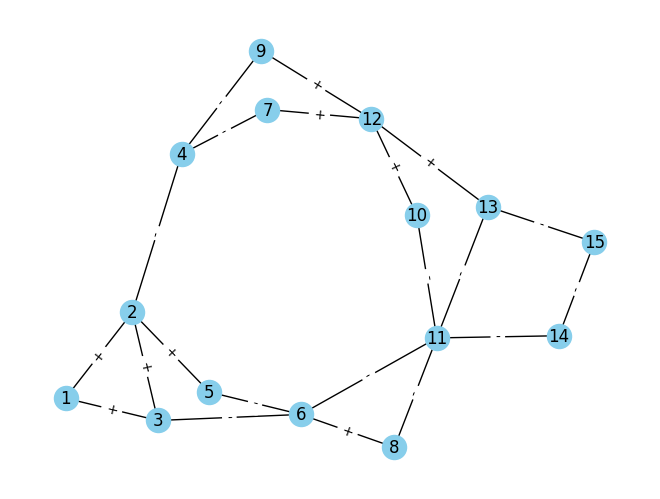

In [21]:
print("a)")
print("original graph:")
original_graph = nx.Graph()

original_graph_edges = [
	("1", "2", "+"), ("1", "3", "+"), ("2", "3", "+"), ("2", "4", "-"), ("2", "5", "+"), ("3", "6", "-")
	,("4", "7", "-"), ("4", "9", "-"), ("5", "6", "-"), ("6", "8", "+"), ("6", "11", "-"), ("7", "12", "+")
	,("8", "11", "-"), ("9", "12", "+"), ("10", "11", "-"), ("10", "12", "+"), ("11", "13", "-")
	,("11", "14", "-"), ("12", "13", "+"), ("13", "15", "-"), ("14", "15", "-")
]
original_graph.add_edges_from((u, v, {"sign": sign}) for u, v, sign in original_graph_edges)

pos = nx.spring_layout(original_graph)
nx.draw(original_graph, pos, node_color="skyblue", with_labels = True)
nx.draw_networkx_edge_labels(original_graph, pos, edge_labels = nx.get_edge_attributes(original_graph, 'sign'))
plt.show()

In [13]:
print(f"Balance Test result for the original network stored from Figure 5.8 in the textbook: {baltest(original_graph)}")

Balance Test result for the original network stored from Figure 5.8 in the textbook: False


b)
modified version of the graph, with negative sign for the edge between node 2 and node 4:


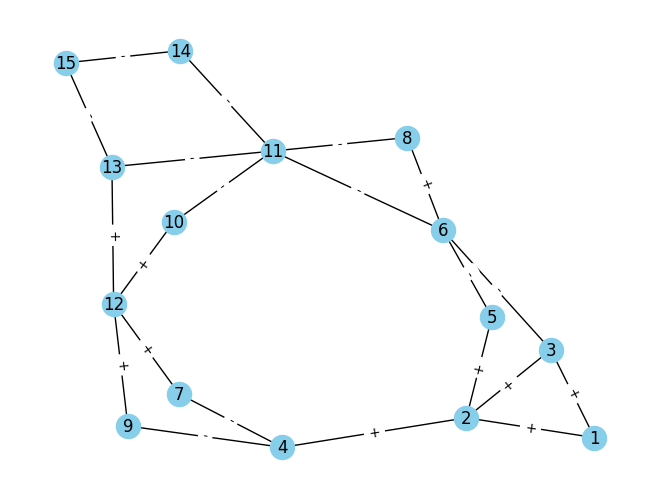

In [14]:
print("b)")
print("modified version of the graph, with negative sign for the edge between node 2 and node 4:")
modified_graph = nx.Graph()
# modified version of the network, with negative sign for the edge between node 2 and node 4
modified_graph_edges = [
	("1", "2", "+"), ("1", "3", "+"), ("2", "3", "+"), ("2", "4", "+"), ("2", "5", "+"), ("3", "6", "-")
	,("4", "7", "-"), ("4", "9", "-"), ("5", "6", "-"), ("6", "8", "+"), ("6", "11", "-"), ("7", "12", "+")
	,("8", "11", "-"), ("9", "12", "+"), ("10", "11", "-"), ("10", "12", "+"), ("11", "13", "-")
	,("11", "14", "-"), ("12", "13", "+"), ("13", "15", "-"), ("14", "15", "-")
]
modified_graph.add_edges_from((u, v, {"sign": sign}) for u, v, sign in modified_graph_edges)

pos = nx.spring_layout(modified_graph)
nx.draw(modified_graph, pos, node_color="skyblue", with_labels = True)
nx.draw_networkx_edge_labels(modified_graph, pos, edge_labels = nx.get_edge_attributes(modified_graph, 'sign'))
plt.show()

In [15]:
print(f"Balance Test result for the modified network stored from Figure 5.8 in the textbook: {baltest(modified_graph)}")

Balance Test result for the modified network stored from Figure 5.8 in the textbook: True


In [16]:
def find_disjoint_sets(G: nx.Graph):
	positive_edges = [(u, v) for u, v, sign in G.edges(data="sign") if sign == '+']
	G_plus = G.edge_subgraph(positive_edges).copy()
	for node in G.nodes:
		if node not in G_plus:
			G_plus.add_node(node)
	connected_components = list(nx.connected_components(G_plus))
	for component in connected_components:
		for u, v in G_plus.edges(component):
			if G[u][v].get('sign') == '-':
				return False
	supernode_graph = nx.Graph()
	node_to_component = {node: i for i, comp in enumerate(connected_components) for node in comp}
	supernode_graph.add_nodes_from(range(len(connected_components)))
	for u, v, data in G.edges(data=True):
		if data.get('sign') == '-' and node_to_component[u] != node_to_component[v]:
			supernode_graph.add_edge(node_to_component[u], node_to_component[v])
	bfs_layer = nx.single_source_shortest_path_length(supernode_graph, 0)

	set_even, set_odd = set(), set()
	for node, layer in bfs_layer.items():
		if layer % 2 == 0:
			set_even.update({n for n in G.nodes if node_to_component[n] == node})
		else:
			set_odd.update({n for n in G.nodes if node_to_component[n] == node})

	return set_even, set_odd


In [17]:
def find_cycle_sets(G: nx.Graph):
	positive_edges = [(u, v) for u, v, sign in G.edges(data="sign") if sign == '+']
	G_plus = G.edge_subgraph(positive_edges).copy()
	for node in G.nodes:
		if node not in G_plus:
			G_plus.add_node(node)
	connected_components = list(nx.connected_components(G_plus))
	for component in connected_components:
		for u, v in G_plus.edges(component):
			if G[u][v].get('sign') == '-':
				return False
	supernode_graph = nx.Graph()
	node_to_component = {node: i for i, comp in enumerate(connected_components) for node in comp}
	supernode_graph.add_nodes_from(range(len(connected_components)))
	for u, v, data in G.edges(data=True):
		if data.get('sign') == '-' and node_to_component[u] != node_to_component[v]:
			supernode_graph.add_edge(node_to_component[u], node_to_component[v])
	bfs_layer = nx.single_source_shortest_path_length(supernode_graph, 0)

	for u, v in supernode_graph.edges():
		if bfs_layer[u] == bfs_layer[v]:
			cycle = nx.find_cycle(supernode_graph, source=u)
			cycle_sets = []
			for super_u, super_v in cycle:
				component_u = {node for node in G.nodes if node_to_component[node] == super_u}
				component_v = {node for node in G.nodes if node_to_component[node] == super_v}
				cycle_sets.append(component_u)
				cycle_sets.append(component_v)
			return cycle_sets

In [18]:
graph_list = [original_graph, modified_graph]
for graph in graph_list:
	balance_test_result = baltest(graph)
	if balance_test_result:
		print(f"Balance Test result for graph {graph}: {balance_test_result}")
		print(f"Report of the two disjoint sets of nodes that are implied by balance: {find_disjoint_sets(graph)}")
	if not balance_test_result:
		print(f"Balance Test result for graph {graph}: {balance_test_result}")
		print(f"Report of the cycle that that is implied by the unbalance: {find_cycle_sets(graph)}")


Balance Test result for graph Graph with 15 nodes and 21 edges: False
Report of the cycle that that is implied by the unbalance: [{'10', '9', '12', '13', '7'}, {'4'}, {'4'}, {'5', '2', '1', '3'}, {'5', '2', '1', '3'}, {'8', '6'}, {'8', '6'}, {'11'}, {'11'}, {'10', '9', '12', '13', '7'}]
Balance Test result for graph Graph with 15 nodes and 21 edges: True
Report of the two disjoint sets of nodes that are implied by balance: ({'5', '15', '2', '1', '4', '11', '3'}, {'10', '14', '8', '9', '12', '6', '13', '7'})


The original graph from Fig. 5.8 of Networks, Crowds, and Markets: Reasoning About a Highly Connected World is reported unbalanced as already stated by the book and the cycle in the graph with supernodes is composed of:
{'10', '9', '12', '13', '7'} -> {'4'},
{'4'} -> {'5', '2', '1', '3'},
{'5', '2', '1', '3'} -> {'8', '6'},
{'8', '6'} -> {'11'},
{'11'} -> {'10', '9', '12', '13', '7'}

The same graph with updated sign for the edge between node 2 and node 4 (i.e., the edge between them now has positive rather than negative sign), becomes balanced and the two disjoint sets implied by the balance are the following:
{'5', '15', '2', '1', '4', '11', '3'}, 
{'10', '14', '8', '9', '12', '6', '13', '7'}